In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/dgagne/data/cabauw_derived_data.csv", index_col="Time", parse_dates=["Time"])
data = data.dropna()

In [5]:
data["log friction velocity"] = np.log10(data["friction velocity_surface_m s-1"])

In [6]:
split_date = pd.Timestamp("2010-01-01")
train_data = data.loc[:split_date]
test_data = data.loc[split_date:]

In [4]:
data.columns

Index(['global horizontal irradiance_0 m_W m-2', 'zenith_0 m_degrees',
       'azimuth_0 m_degrees', 'temperature_10 m_K', 'temperature_2 m_K',
       'pressure_2 m_hPa', 'potential temperature_10 m_K',
       'potential temperature_2 m_K', 'mixing ratio_10 m_g kg-1',
       'relative humidity_10 m_%', 'virtual potential temperature_10 m_K',
       'air density_10 m_kg m-3', 'wind speed_10 m_m s-1',
       'wind direction_10 m_m s-1', 'wind speed_20 m_m s-1',
       'wind direction_20 m_m s-1', 'wind speed_40 m_m s-1',
       'wind direction_40 m_m s-1', 'u wind_10 m_m s-1', 'v wind_10 m_m s-1',
       'u wind_20 m_m s-1', 'v wind_20 m_m s-1', 'u wind_40 m_m s-1',
       'v wind_40 m_m s-1', 'mixing ratio_2 m_g kg-1',
       'virtual potential temperature_2 m_K', 'relative humidity_2 m_%',
       'soil temperature_0 cm_K', 'soil temperature_4 cm_K',
       'soil potential temperature_0 cm_K',
       'soil potential temperature_4 cm_K', 'soil water content_3 cm_m3 m-3',
       'soil wat

# Friction Velocity
Compare random forest predicting log of friction velocity with raw value.

In [36]:
input_cols = ['global horizontal irradiance_0 m_W m-2', 'zenith_0 m_degrees',
       'azimuth_0 m_degrees',
       'pressure_2 m_hPa', 'potential temperature_10 m_K',
       'potential temperature_2 m_K', 'mixing ratio_10 m_g kg-1',
       'relative humidity_10 m_%',
       'air density_10 m_kg m-3', 'wind speed_10 m_m s-1',
       'wind direction_10 m_m s-1', 'wind speed_20 m_m s-1',
       'wind direction_20 m_m s-1', 'wind speed_40 m_m s-1',
       'wind direction_40 m_m s-1', 'u wind_10 m_m s-1', 'v wind_10 m_m s-1',
       'u wind_20 m_m s-1', 'v wind_20 m_m s-1', 'u wind_40 m_m s-1',
       'v wind_40 m_m s-1', 'mixing ratio_2 m_g kg-1',
       'relative humidity_2 m_%', 'bulk richardson_10-2 m_']
output_col_1 = 'friction velocity_surface_m s-1'
output_col_2 = "log friction velocity"

In [37]:
rf_1 = RandomForestRegressor(n_estimators=50, n_jobs=4, max_features="sqrt")
rf_1.fit(train_data[input_cols], train_data[output_col_1])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
rf_1_rankings = np.argsort(rf_1.feature_importances_)[::-1]
for f in rf_1_rankings:
    print(input_cols[f], rf_1.feature_importances_[f])

wind speed_10 m_m s-1 0.24471675945826163
wind speed_20 m_m s-1 0.17865812365076258
wind speed_40 m_m s-1 0.14015547019264507
bulk richardson_10-2 m_ 0.10894561925426945
u wind_10 m_m s-1 0.04576146562653131
v wind_10 m_m s-1 0.04526826535211414
v wind_20 m_m s-1 0.03396167046267179
u wind_20 m_m s-1 0.03089822755746316
v wind_40 m_m s-1 0.030069465643508732
u wind_40 m_m s-1 0.029877901086940786
zenith_0 m_degrees 0.0225892117104143
global horizontal irradiance_0 m_W m-2 0.011349177229408732
pressure_2 m_hPa 0.011288548020325145
relative humidity_2 m_% 0.008240212375059673
potential temperature_2 m_K 0.0074203354430048786
air density_10 m_kg m-3 0.006669746757566903
potential temperature_10 m_K 0.006628760784371951
relative humidity_10 m_% 0.006039726376073768
wind direction_10 m_m s-1 0.005924722940739175
mixing ratio_2 m_g kg-1 0.005568979011811581
mixing ratio_10 m_g kg-1 0.005133501847451854
wind direction_20 m_m s-1 0.005133309953068223
wind direction_40 m_m s-1 0.005014051359848

In [39]:
rf_2 = RandomForestRegressor(n_estimators=50, n_jobs=4, max_features="sqrt")
rf_2.fit(train_data[input_cols], train_data[output_col_2])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
rf_2_rankings = np.argsort(rf_2.feature_importances_)[::-1]
for f in rf_2_rankings:
    print(input_cols[f], rf_2.feature_importances_[f])

bulk richardson_10-2 m_ 0.30071814217298054
wind speed_10 m_m s-1 0.22222625087950346
wind speed_20 m_m s-1 0.0994258673387301
wind speed_40 m_m s-1 0.08078552966291744
u wind_10 m_m s-1 0.04912645708630341
u wind_20 m_m s-1 0.029869312885715052
zenith_0 m_degrees 0.029390810809607176
v wind_20 m_m s-1 0.028186960531855754
u wind_40 m_m s-1 0.02255291346052367
v wind_10 m_m s-1 0.02232791033478225
global horizontal irradiance_0 m_W m-2 0.01985238988261361
v wind_40 m_m s-1 0.01750799570874761
relative humidity_2 m_% 0.009109585510263113
potential temperature_2 m_K 0.008282513722448981
relative humidity_10 m_% 0.008010446025607314
air density_10 m_kg m-3 0.00732063893573703
potential temperature_10 m_K 0.006361618783946857
mixing ratio_2 m_g kg-1 0.006011237579943004
azimuth_0 m_degrees 0.005876427953859607
pressure_2 m_hPa 0.005764015819333502
wind direction_10 m_m s-1 0.0055057623474816485
mixing ratio_10 m_g kg-1 0.005476916964704138
wind direction_20 m_m s-1 0.005199748921922237
win

In [41]:
rf_1_preds = rf_1.predict(test_data[input_cols])
rf_2_preds = 10 ** rf_2.predict(test_data[input_cols])

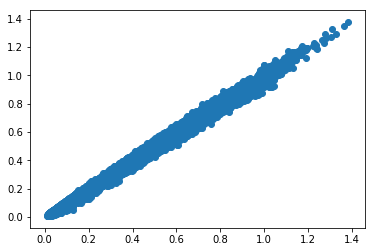

In [42]:
plt.scatter(rf_1_preds, rf_2_preds)

/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


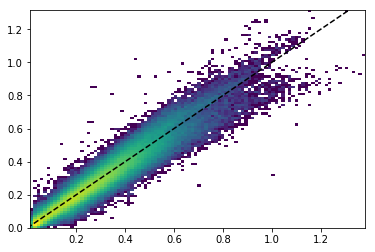

In [93]:
plt.hist2d(rf_1_preds, test_data[output_col_1], bins=100, cmin=1, norm=LogNorm())
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')

/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


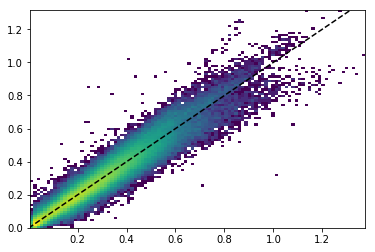

In [95]:
plt.hist2d(rf_2_preds, test_data[output_col_1], bins=100, cmin=1, norm=LogNorm())
plt.plot(np.linspace(0, 1.5), np.linspace(0, 1.5), 'k--')

In [71]:
print(mean_absolute_error(test_data[output_col_1], rf_1_preds))
print(r2_score(test_data[output_col_1], rf_1_preds))

0.030580913838565937
0.9264175676599695


In [69]:
print(mean_absolute_error(test_data[output_col_1], rf_2_preds))
print(r2_score(test_data[output_col_1], rf_2_preds))

0.029755965885766657
0.9291707872081554


(array([1.3130e+03, 1.2922e+04, 1.2875e+04, 9.4550e+03, 8.5150e+03,
        8.7810e+03, 9.2090e+03, 9.0330e+03, 9.1820e+03, 1.0025e+04,
        1.0705e+04, 1.1349e+04, 1.1456e+04, 1.1143e+04, 1.1166e+04,
        1.0928e+04, 1.0410e+04, 1.0205e+04, 9.5930e+03, 9.3400e+03,
        8.9060e+03, 8.7380e+03, 8.3370e+03, 7.8110e+03, 7.2680e+03,
        6.7990e+03, 6.1420e+03, 5.6960e+03, 5.2900e+03, 4.5460e+03,
        4.4060e+03, 3.8090e+03, 3.3490e+03, 2.9070e+03, 2.6910e+03,
        2.3420e+03, 1.9740e+03, 1.9190e+03, 1.6700e+03, 1.5590e+03,
        1.3020e+03, 1.0720e+03, 8.9000e+02, 6.9200e+02, 6.8000e+02,
        5.5000e+02, 4.9200e+02, 4.2400e+02, 4.1300e+02, 3.4300e+02,
        3.5300e+02, 2.7700e+02, 2.7200e+02, 2.4700e+02, 2.2700e+02,
        2.0500e+02, 1.7700e+02, 1.4900e+02, 1.4400e+02, 1.4500e+02,
        1.2400e+02, 1.0900e+02, 1.0500e+02, 9.6000e+01, 9.6000e+01,
        6.8000e+01, 5.9000e+01, 6.0000e+01, 5.6000e+01, 3.6000e+01,
        3.4000e+01, 4.0000e+01, 3.5000e+01, 3.40

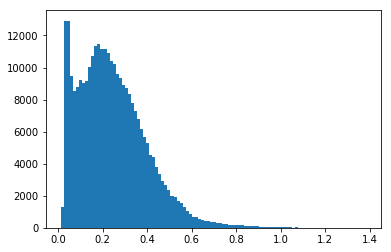

In [47]:
plt.hist(rf_1_preds, bins=100)

(array([1.5870e+03, 1.3376e+04, 1.2750e+04, 9.2320e+03, 8.3530e+03,
        8.4690e+03, 8.8630e+03, 9.0190e+03, 9.2280e+03, 9.6400e+03,
        1.0694e+04, 1.1263e+04, 1.1316e+04, 1.1134e+04, 1.0975e+04,
        1.0858e+04, 1.0422e+04, 1.0179e+04, 9.8230e+03, 9.4140e+03,
        9.1450e+03, 8.6290e+03, 8.5950e+03, 7.9230e+03, 7.3820e+03,
        6.8210e+03, 6.2700e+03, 5.5620e+03, 5.2740e+03, 4.7390e+03,
        4.3300e+03, 3.9100e+03, 3.5000e+03, 3.0190e+03, 2.6320e+03,
        2.3020e+03, 2.1520e+03, 1.9070e+03, 1.7510e+03, 1.5100e+03,
        1.2710e+03, 1.0990e+03, 9.3100e+02, 7.2900e+02, 5.9500e+02,
        4.9800e+02, 4.7000e+02, 4.2600e+02, 3.6300e+02, 3.3700e+02,
        3.6000e+02, 2.8300e+02, 2.8600e+02, 2.4400e+02, 2.3100e+02,
        1.8400e+02, 1.6700e+02, 1.3600e+02, 1.5400e+02, 1.4900e+02,
        1.2600e+02, 1.3800e+02, 1.0700e+02, 8.7000e+01, 7.0000e+01,
        6.4000e+01, 6.9000e+01, 5.3000e+01, 4.4000e+01, 4.1000e+01,
        3.3000e+01, 2.9000e+01, 3.3000e+01, 3.40

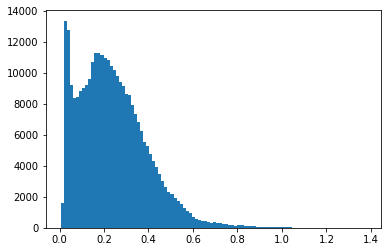

In [48]:
plt.hist(rf_2_preds, bins=100)

In [56]:
rf_t_scale = RandomForestRegressor(n_estimators=50, max_features="sqrt", n_jobs=4)
rf_t_scale.fit(train_data[input_cols], train_data["temperature scale_surface_K"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
rf_t_scale_preds = rf_t_scale.predict(test_data[input_cols])

0.02796847478802994
0.8204229899568719


/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


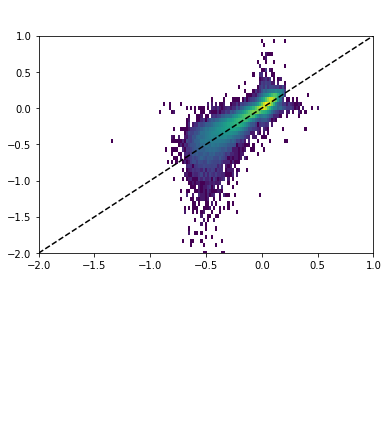

In [67]:
plt.hist2d(rf_t_scale_preds, test_data["temperature scale_surface_K"], cmin=1, bins=100, norm=LogNorm())
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.plot(np.linspace(-2, 1), np.linspace(-2, 1), 'k--')
print(mean_absolute_error(test_data["temperature scale_surface_K"], rf_t_scale_preds))
print(r2_score(test_data["temperature scale_surface_K"], rf_t_scale_preds))

In [64]:
rf_t_rankings = np.argsort(rf_t_scale.feature_importances_)[::-1]
for f in rf_t_rankings:
    print(input_cols[f], rf_t_scale.feature_importances_[f])

bulk richardson_10-2 m_ 0.23447969451799175
global horizontal irradiance_0 m_W m-2 0.20379308779038266
zenith_0 m_degrees 0.13477522621887694
wind speed_40 m_m s-1 0.04497882058928351
relative humidity_2 m_% 0.04414110070546123
relative humidity_10 m_% 0.03600977662291268
wind speed_20 m_m s-1 0.03300547049547758
azimuth_0 m_degrees 0.032856202815214994
wind speed_10 m_m s-1 0.025824485981541013
potential temperature_2 m_K 0.021287450526441973
u wind_40 m_m s-1 0.017427895393389035
potential temperature_10 m_K 0.01723380996664005
air density_10 m_kg m-3 0.016796937835495022
v wind_40 m_m s-1 0.014768025272482707
mixing ratio_10 m_g kg-1 0.014274730974875336
u wind_10 m_m s-1 0.013422500823456458
pressure_2 m_hPa 0.013269538853492618
u wind_20 m_m s-1 0.012809053602676335
v wind_20 m_m s-1 0.012633970337795588
mixing ratio_2 m_g kg-1 0.01242126726346436
v wind_10 m_m s-1 0.011342777396206326
wind direction_40 m_m s-1 0.011075550121742574
wind direction_10 m_m s-1 0.010829401195769748
wi

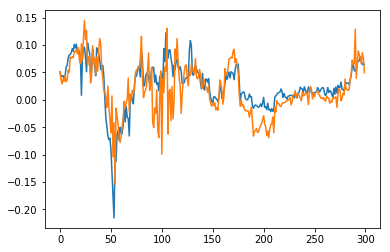

In [80]:
plt.plot(rf_t_scale_preds[300:600])
plt.plot(test_data["temperature scale_surface_K"].values[300:600])

In [89]:
t_scale_class = RandomForestClassifier(n_estimators=50, n_jobs=4, max_features="sqrt", class_weight="balanced")
t_scale_class.fit(train_data[input_cols], np.where(train_data["temperature scale_surface_K"] >= 0, 1, -1))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [90]:
t_scale_sign_preds = t_scale_class.predict(test_data[input_cols])

In [91]:
test_sign_labels = np.where(test_data["temperature scale_surface_K"] >= 0, 1, -1)
confusion_matrix(test_sign_labels, t_scale_sign_preds)

array([[ 85650,  14184],
       [ 10040, 194073]])

In [92]:
confusion_matrix(test_sign_labels, np.where(rf_t_scale_preds >= 0, 1, -1))

array([[ 87090,  12744],
       [ 12268, 191845]])

In [96]:
t_scale_neg_reg = RandomForestRegressor(n_estimators=50, n_jobs=4, max_features="sqrt")
neg_t_scale = train_data["temperature scale_surface_K"] < 0
t_scale_neg_reg.fit(train_data.loc[neg_t_scale, input_cols], 
                    np.log(-train_data.loc[neg_t_scale, "temperature scale_surface_K"]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
t_scale_pos_reg = RandomForestRegressor(n_estimators=50, n_jobs=4, max_features="sqrt")
pos_t_scale = train_data["temperature scale_surface_K"] > 0
t_scale_pos_reg.fit(train_data.loc[pos_t_scale, input_cols], 
                    np.log(train_data.loc[pos_t_scale, "temperature scale_surface_K"]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
t_scale_pos_preds = t_scale_pos_reg.predict(test_data[input_cols])
t_scale_neg_preds = t_scale_neg_reg.predict(test_data[input_cols])

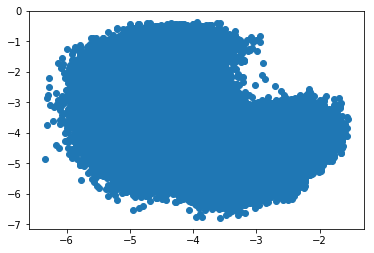

In [99]:
plt.scatter(t_scale_pos_preds, t_scale_neg_preds)

In [100]:
t_scale_combined_preds = np.where(t_scale_sign_preds > 0, np.exp(t_scale_pos_preds), -np.exp(t_scale_neg_preds))

Text(0.5,0,'MAE: 0.0280 R$^2$: 0.820')

/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


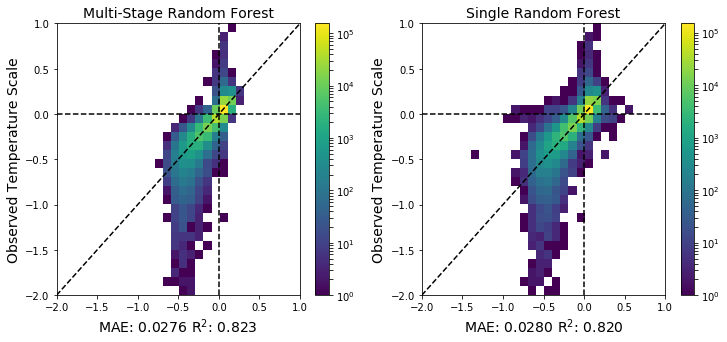

In [132]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist2d(t_scale_combined_preds, test_data["temperature scale_surface_K"], cmin=1, bins=np.linspace(-2,1,31), norm=LogNorm())
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.plot(np.linspace(-2, 1), np.linspace(-2, 1), 'k--')
plt.plot(np.zeros(50), np.linspace(-2, 1), 'k--')
plt.plot(np.linspace(-2, 1), np.zeros(50), 'k--')
plt.colorbar()
plt.title("Multi-Stage Random Forest", fontsize=14)
plt.ylabel("Observed Temperature Scale", fontsize=14)
mae_rf_multi = mean_absolute_error(test_data["temperature scale_surface_K"], t_scale_combined_preds)
r2_rf_multi = r2_score(test_data["temperature scale_surface_K"], t_scale_combined_preds)
plt.xlabel("MAE: {0:0.4f} R$^2$: {1:0.3f}".format(mae_rf_multi, r2_rf_multi), fontsize=14)
plt.subplot(1, 2, 2)
plt.hist2d(rf_t_scale_preds, test_data["temperature scale_surface_K"], cmin=1, bins=np.linspace(-2,1,31), norm=LogNorm())
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.plot(np.linspace(-2, 1), np.linspace(-2, 1), 'k--')
plt.plot(np.zeros(50), np.linspace(-2, 1), 'k--')
plt.plot(np.linspace(-2, 1), np.zeros(50), 'k--')

plt.title("Single Random Forest", fontsize=14)
plt.ylabel("Observed Temperature Scale", fontsize=14)
plt.colorbar()

mae_rf_single = mean_absolute_error(test_data["temperature scale_surface_K"], rf_t_scale_preds)
r2_rf_single = r2_score(test_data["temperature scale_surface_K"], rf_t_scale_preds)
plt.xlabel("MAE: {0:0.4f} R$^2$: {1:0.3f}".format(mae_rf_single, r2_rf_single), fontsize=14)